In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Loading the datasets
folder_path = './Dataset Files/'

customers_df = pd.read_csv(folder_path + 'Customers.csv')
products_df = pd.read_csv(folder_path + 'Products.csv')
transactions_df = pd.read_csv(folder_path + 'Transactions.csv')

# Basic statistics
print("Customer Statistics:")
print(customers_df.describe())
print("\nProduct Statistics:")
print(products_df.describe())
print("\nTransaction Statistics:")
print(transactions_df.describe())

Customer Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3

Product Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transaction Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [3]:
# Verify by displaying the first few rows of each DataFrame
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
# checking for missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [6]:
# checking for duplicate values
print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

0
0
0


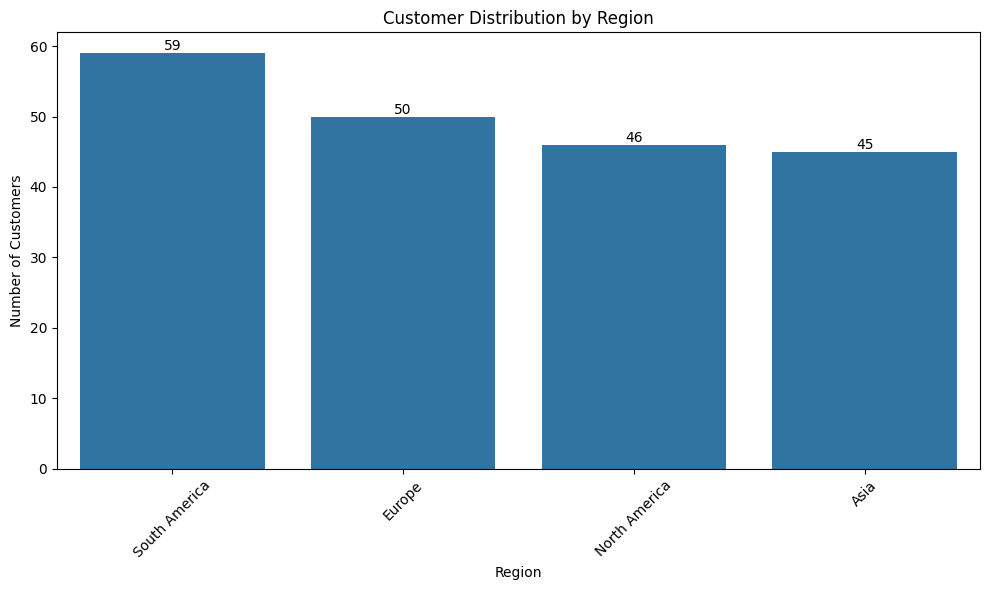

In [8]:
# Insight 1: Regional Market Dominance
plt.figure(figsize=(10, 6))
customers_by_region = customers_df['Region'].value_counts()
sns.barplot(x=customers_by_region.index, y=customers_by_region.values)

for index, value in enumerate(customers_by_region.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

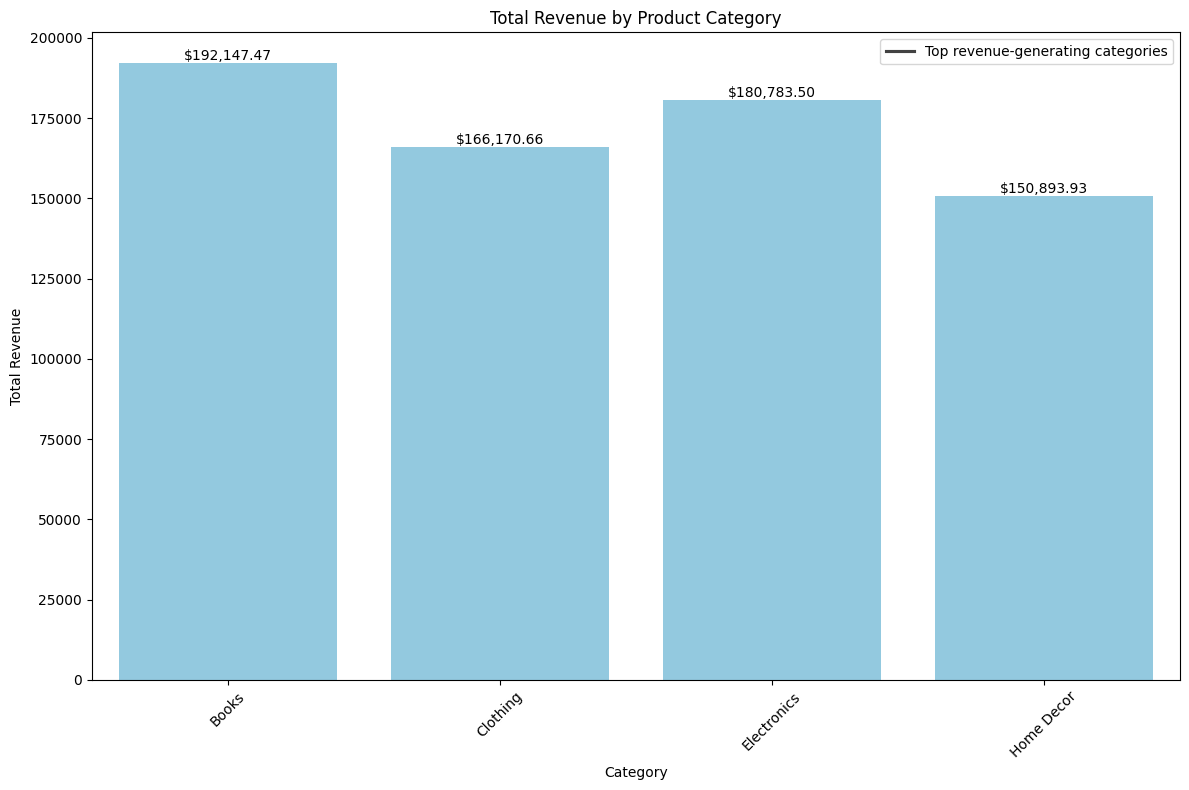

In [11]:
# Insight 2: Product Category Performance
plt.figure(figsize=(12, 8))  # Increase the figure size
category_revenue = transactions_df.merge(products_df, on='ProductID').groupby('Category')['TotalValue'].sum()
sns.barplot(x=category_revenue.index, y=category_revenue.values, color='skyblue') 

for index, value in enumerate(category_revenue.values):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom')

plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()


plt.legend(['Top revenue-generating categories'], loc='upper right')

plt.show()

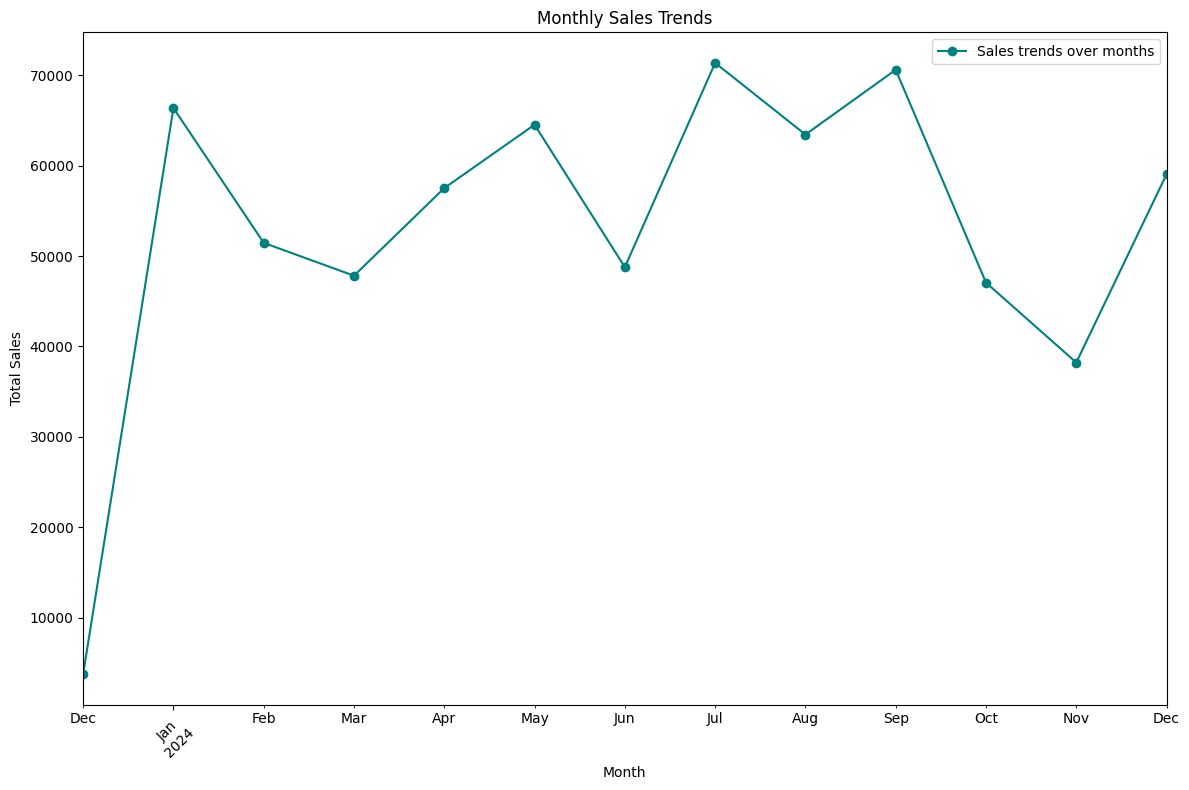

In [12]:
# Insight 3: Seasonal Trends
plt.figure(figsize=(12, 8))
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', color='teal')

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(['Sales trends over months'], loc='upper right')

plt.show()

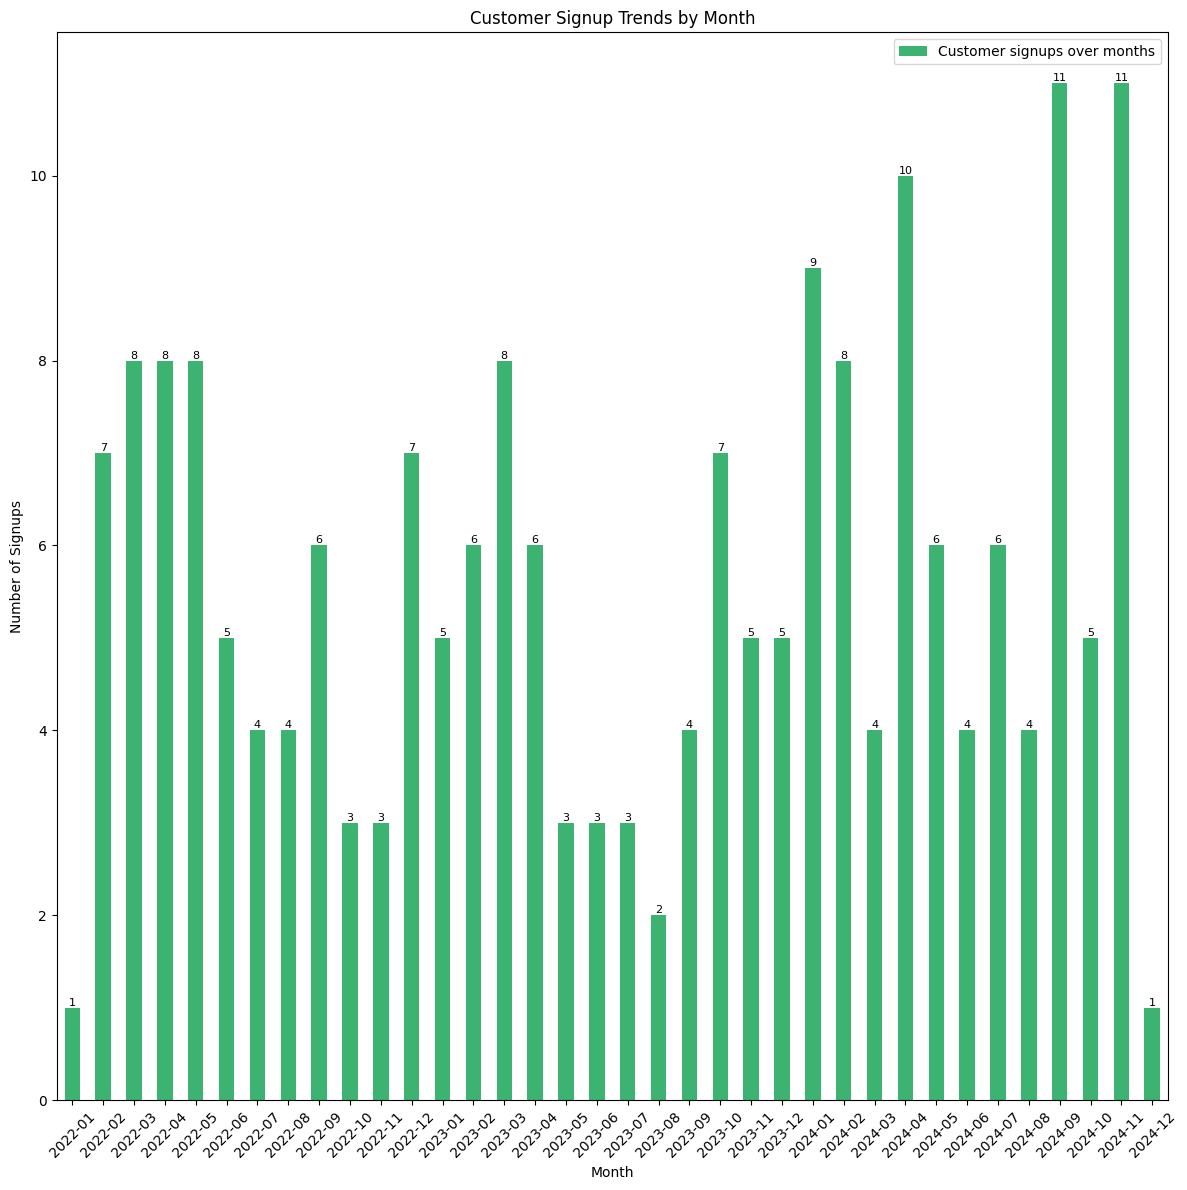

In [26]:
# Insight 4: Customer Signup Trends by Month
plt.figure(figsize=(12, 12))
signup_month = customers_df['SignupDate'].dt.to_period('M')
signup_trends = signup_month.value_counts().sort_index()
signup_trends.plot(kind='bar', color='mediumseagreen')

for index, value in enumerate(signup_trends.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

plt.title('Customer Signup Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(['Customer signups over months'], loc='upper right')

plt.show()

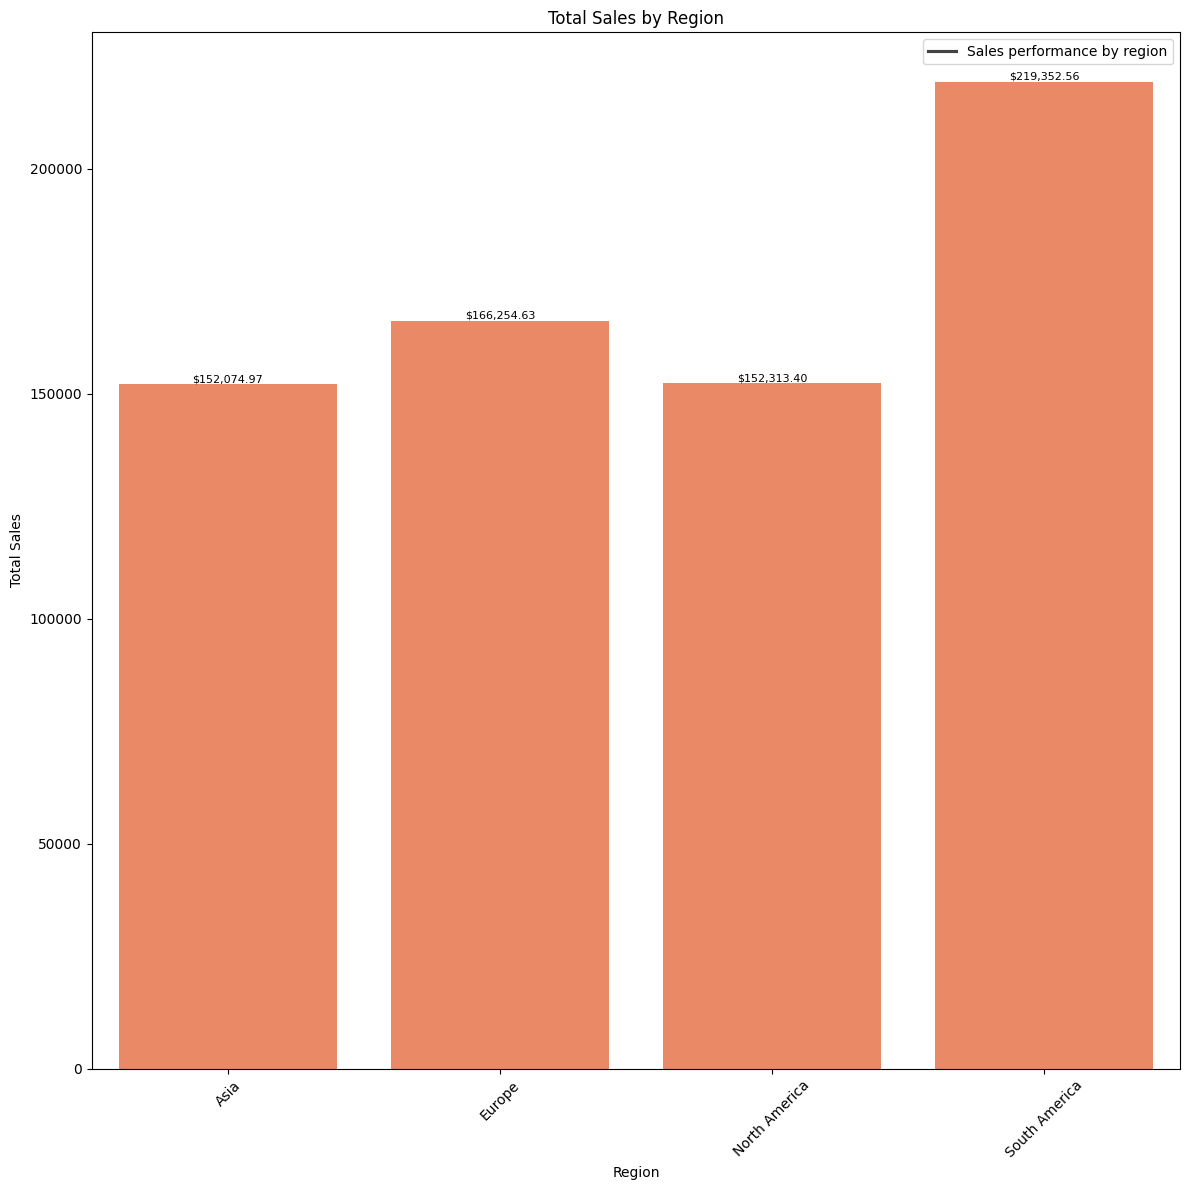

In [27]:
# Insight 5: Regional Sales Performance
plt.figure(figsize=(12, 12))
regional_sales = transactions_df.merge(customers_df, on='CustomerID').groupby('Region')['TotalValue'].sum()
sns.barplot(x=regional_sales.index, y=regional_sales.values, color='coral')

for index, value in enumerate(regional_sales.values):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(['Sales performance by region'], loc='upper right')

plt.show()

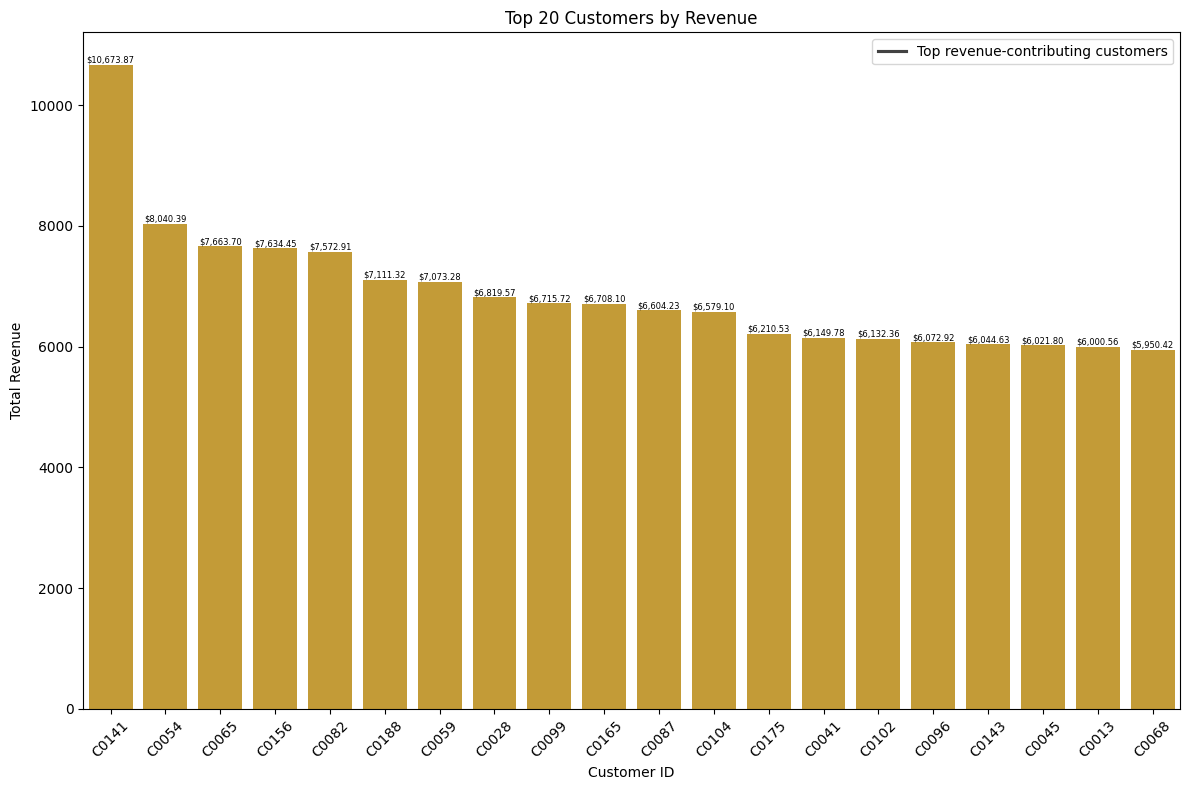

In [22]:
# Insight 6: Customer Purchase Patterns
plt.figure(figsize=(12, 8))
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(20)
sns.barplot(x=top_customers.index, y=top_customers.values, color='goldenrod')

for index, value in enumerate(top_customers.values):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom', fontsize= 6) 

plt.title('Top 20 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(['Top revenue-contributing customers'], loc='upper right')

plt.show()

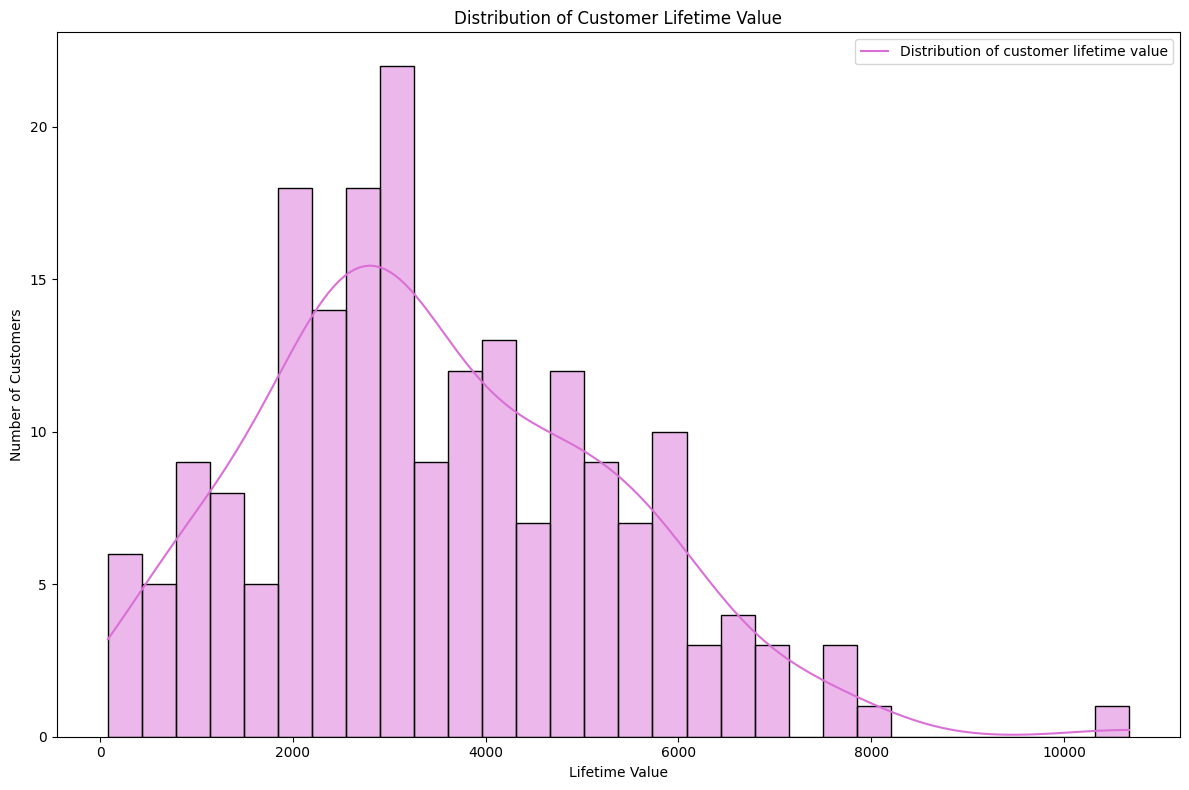

In [23]:
# Insight 7: Customer Lifecycle Value
plt.figure(figsize=(12, 8))
customer_lifetime_value = transactions_df.groupby('CustomerID')['TotalValue'].sum()
sns.histplot(customer_lifetime_value, bins=30, kde=True, color='orchid')

plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.tight_layout()

plt.legend(['Distribution of customer lifetime value'], loc='upper right')

plt.show()

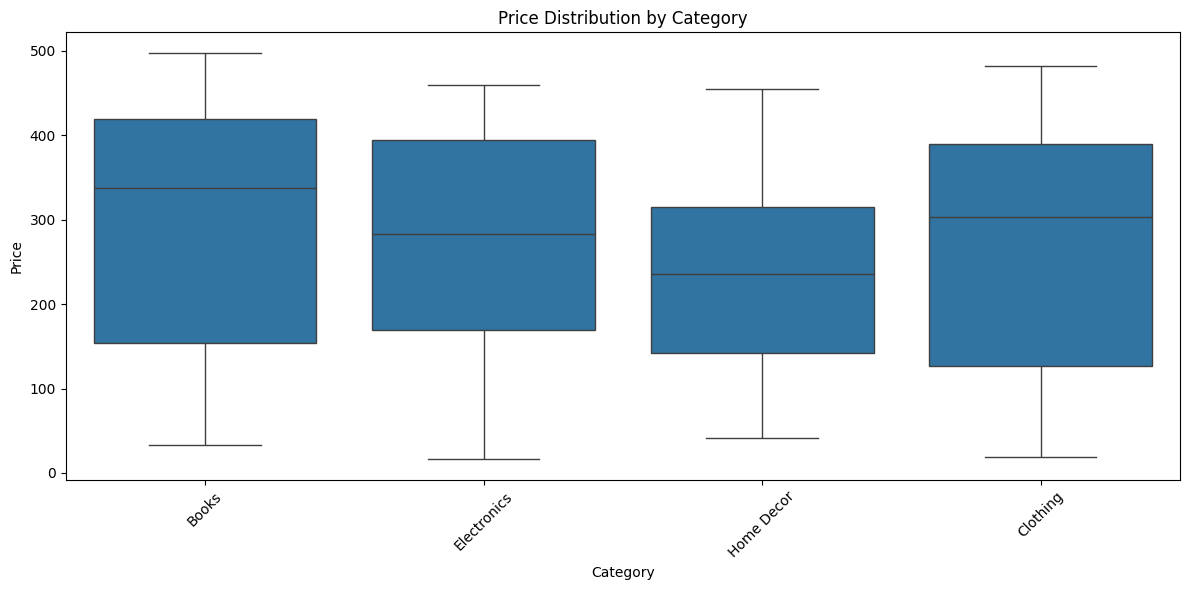

In [29]:
# Insight 8: Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products_df)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

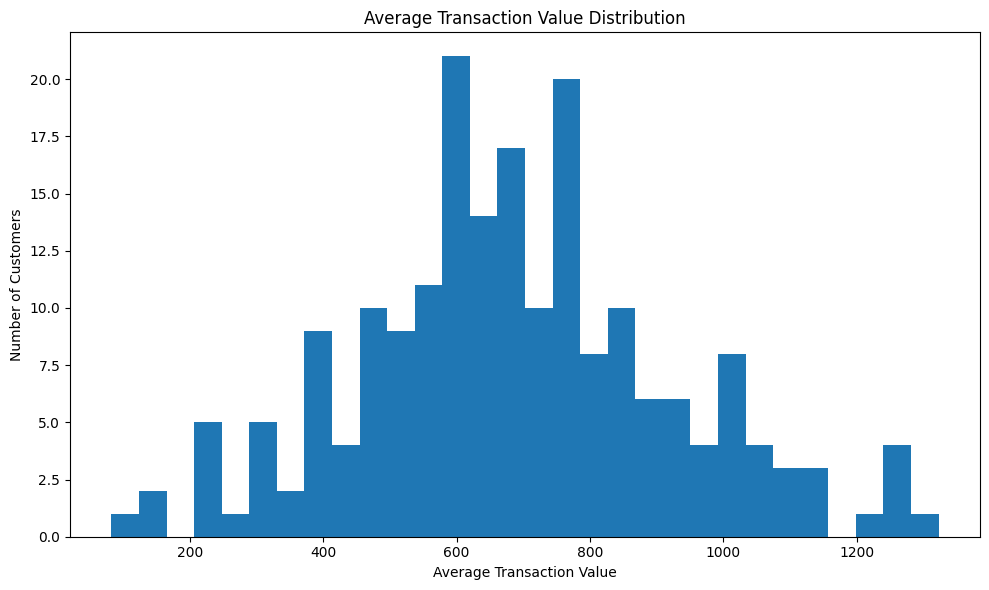

In [30]:
# Insight 9 : Average transaction value by customer
avg_transaction = transactions_df.groupby('CustomerID')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
plt.hist(avg_transaction, bins=30)
plt.title('Average Transaction Value Distribution')
plt.xlabel('Average Transaction Value')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

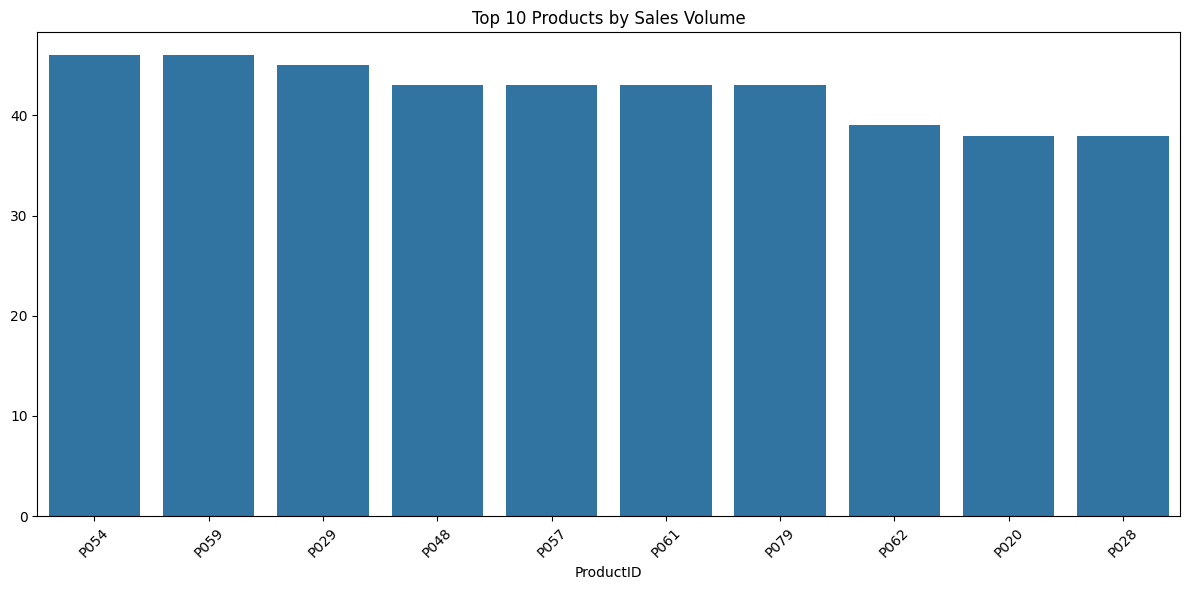

In [31]:
# Insight 10: Top Products
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()